,symbol,return_2018,return_2019
0,AAPL,-0.053902,0.889578
1,MSFT,0.207953,0.575581
2,AMZN,0.284317,0.230278
3,FB,-0.257112,0.565718
4,GOOGL,-0.008012,0.281762


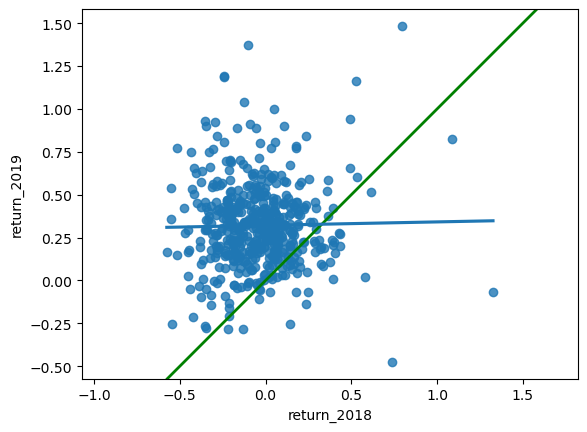

In [3]:
############################################
#regression to the mean
#extreme cases don't persist over time
############################################

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sp500_yearly_returns = pd.read_csv("datasets/sp500_yearly_returns.csv")
display(sp500_yearly_returns.head(5))

#Regression to the mean is an important concept in investing. 
#Here is the annual returns from investing in companies i
#in the Standard and Poor 500 index (S&P 500), in 2018 and 2019.

#A positive number for the return means the investment increased in value; negative means it lost value.
#a naive prediction might be that the investment performance stays the same 
#from year to year, lying on the y equals x line.

# Create a new figure, fig
fig = plt.figure()

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(data=sp500_yearly_returns, y="return_2019", x="return_2018", ci=None)

# Set the axes so that the distances along the x and y axes look the same
plt.axis("equal")

plt.show()

#The regression trend line looks very different to the y equals x line. 
#As the financial advisors say, "Past performance is no guarantee of future results."



In [6]:
#Modeling consecutive returns
#quantify the relationship between returns in 2019 and 2018 
#by running a linear regression and making predictions.
#By looking at companies with extremely high or extremely low returns in 2018, 
#we can see if their performance was similar in 2019.

from statsmodels.formula.api import ols
# Run a linear regression on return_2019 vs. return_2018 using sp500_yearly_returns
mdl_returns = ols("return_2019 ~ return_2018", data=sp500_yearly_returns).fit()

# Print the parameters
print(mdl_returns.params)


mdl_returns = ols("return_2019 ~ return_2018", data=sp500_yearly_returns).fit()

# Create a DataFrame with return_2018 at -1, 0, and 1 
explanatory_data = pd.DataFrame({"return_2018": [-1, 0, 1]})

# Use mdl_returns to predict with explanatory_data
print(mdl_returns.predict(explanatory_data))

#Investments that gained a lot in value in 2018 on average gained only a small amount in 2019. 
#Similarly, investments that lost a lot of value in 2018 on average also gained a small amount in 2019.



Intercept      0.321321
return_2018    0.020069
dtype: float64
0    0.301251
1    0.321321
2    0.341390
dtype: float64
